# `nb02b`: JAX: Numpy, but differentiable and on GPUs

![](figures/nb02/jax.png)

JAX is a drop-in replacement for Numpy, but differentiable and compiled using XLA to run on GPUs and CPUs.

In [54]:
import jax
import jax.numpy as jnp
import numpy as np

In [55]:
import matplotlib.pyplot as plt

xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.5, size=(100,))
ys = xs * 3 - 1 + noise

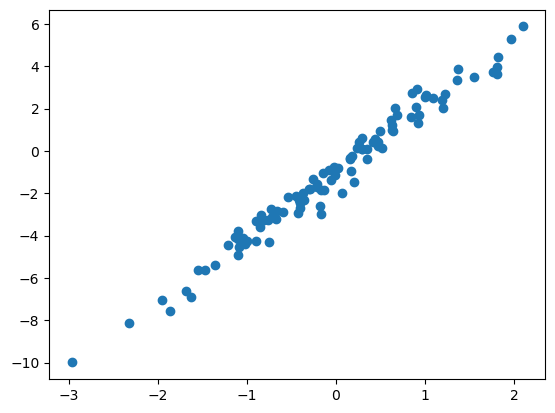

In [56]:
plt.scatter(xs, ys)
plt.show()

In [57]:
def model(theta, x):
    w, b = theta
    return w * x + b

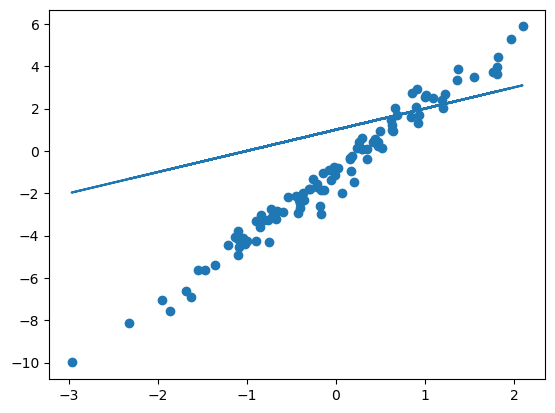

In [58]:
theta = jnp.array([1., 1.])
plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

In [59]:
def loss_fn(theta, x, y):
    prediction = model(theta, x)
    return jnp.mean(jnp.abs(prediction-y))

In [60]:
def update(theta, x, y, lr=0.1):
    return theta - lr * jax.grad(loss_fn)(theta, x, y)

w: 3.11, b: -0.92


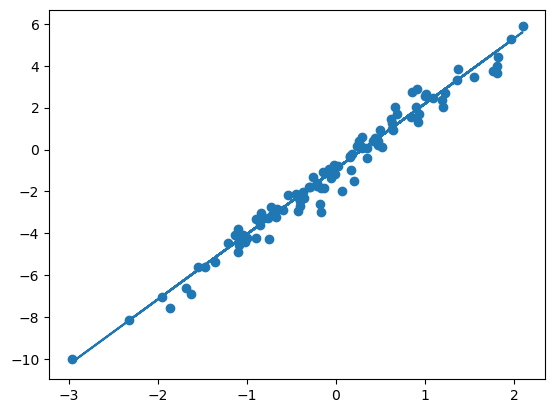

In [61]:
for _ in range(1000):
    theta = update(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")